# MÔ TẢ BÀI TOÁN

- Input: Chữ số viết tay
- Output: Kết quả nhận dạng

Tham khảo: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

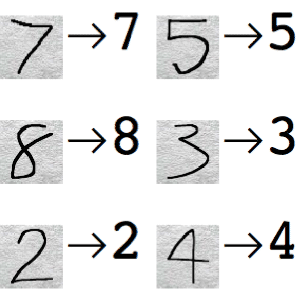

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


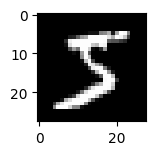

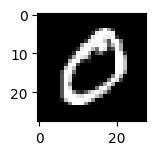

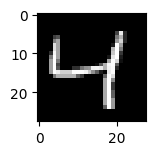

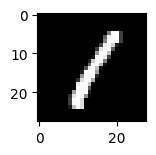

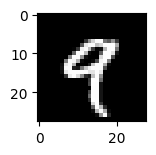

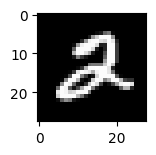

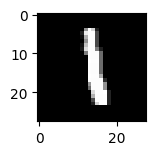

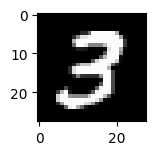

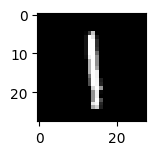

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

# plot first few images
for i in range(9):
  # define subplot
  plt.subplot(330 + 1 + i)
  # plot raw pixel data
  plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
  # show the figure
  plt.show()

In [18]:
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [51]:
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = mnist.load_data()

  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY

In [52]:
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  # return normalized images
  return train_norm, test_norm

In [58]:
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return model

In [49]:
# run the test harness for evaluating a model
def train_model():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()

  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  
  # fit model
  model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=0)

  # save model
  model.save('final_model.h5')

In [ ]:
train_model()

In [19]:
def load_image(filename):
  # load the image
  img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28, 1)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  return img

In [29]:
import os
def create_dataset_from_folder(folder, label):
    images = []
    labels = []
    def load_image(filename):
        img = load_img(filename, color_mode='grayscale', target_size=(28, 28))
        img = img_to_array(img)
        img = img.reshape(28, 28, 1)
        img = img.astype('float32')
        img = img / 255.0
        return img
    for filename in os.listdir(folder):
        img = load_image(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

test_dataset = []
label = []
num_classes = 10

contents = os.listdir('.\\data')
folders = [item for item in contents if os.path.isdir(os.path.join('.\\data', item))]
for folder in folders:
    root_folder = ".\\data\\" + folder
    for class_index in range(0, num_classes):
        class_folder = os.path.join(root_folder, f"{class_index}")
        images, labels = create_dataset_from_folder(class_folder, class_index)
        test_dataset.extend(images)
        label.extend(labels)

In [30]:
#EVALUATATION
import numpy as np
test_dataset = np.array(test_dataset)
label = to_categorical(label)
model = load_model(r'.\final_model.h5')
model.evaluate(test_dataset, label)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1847 - loss: 2.6168  


[2.606295585632324, 0.18333333730697632]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


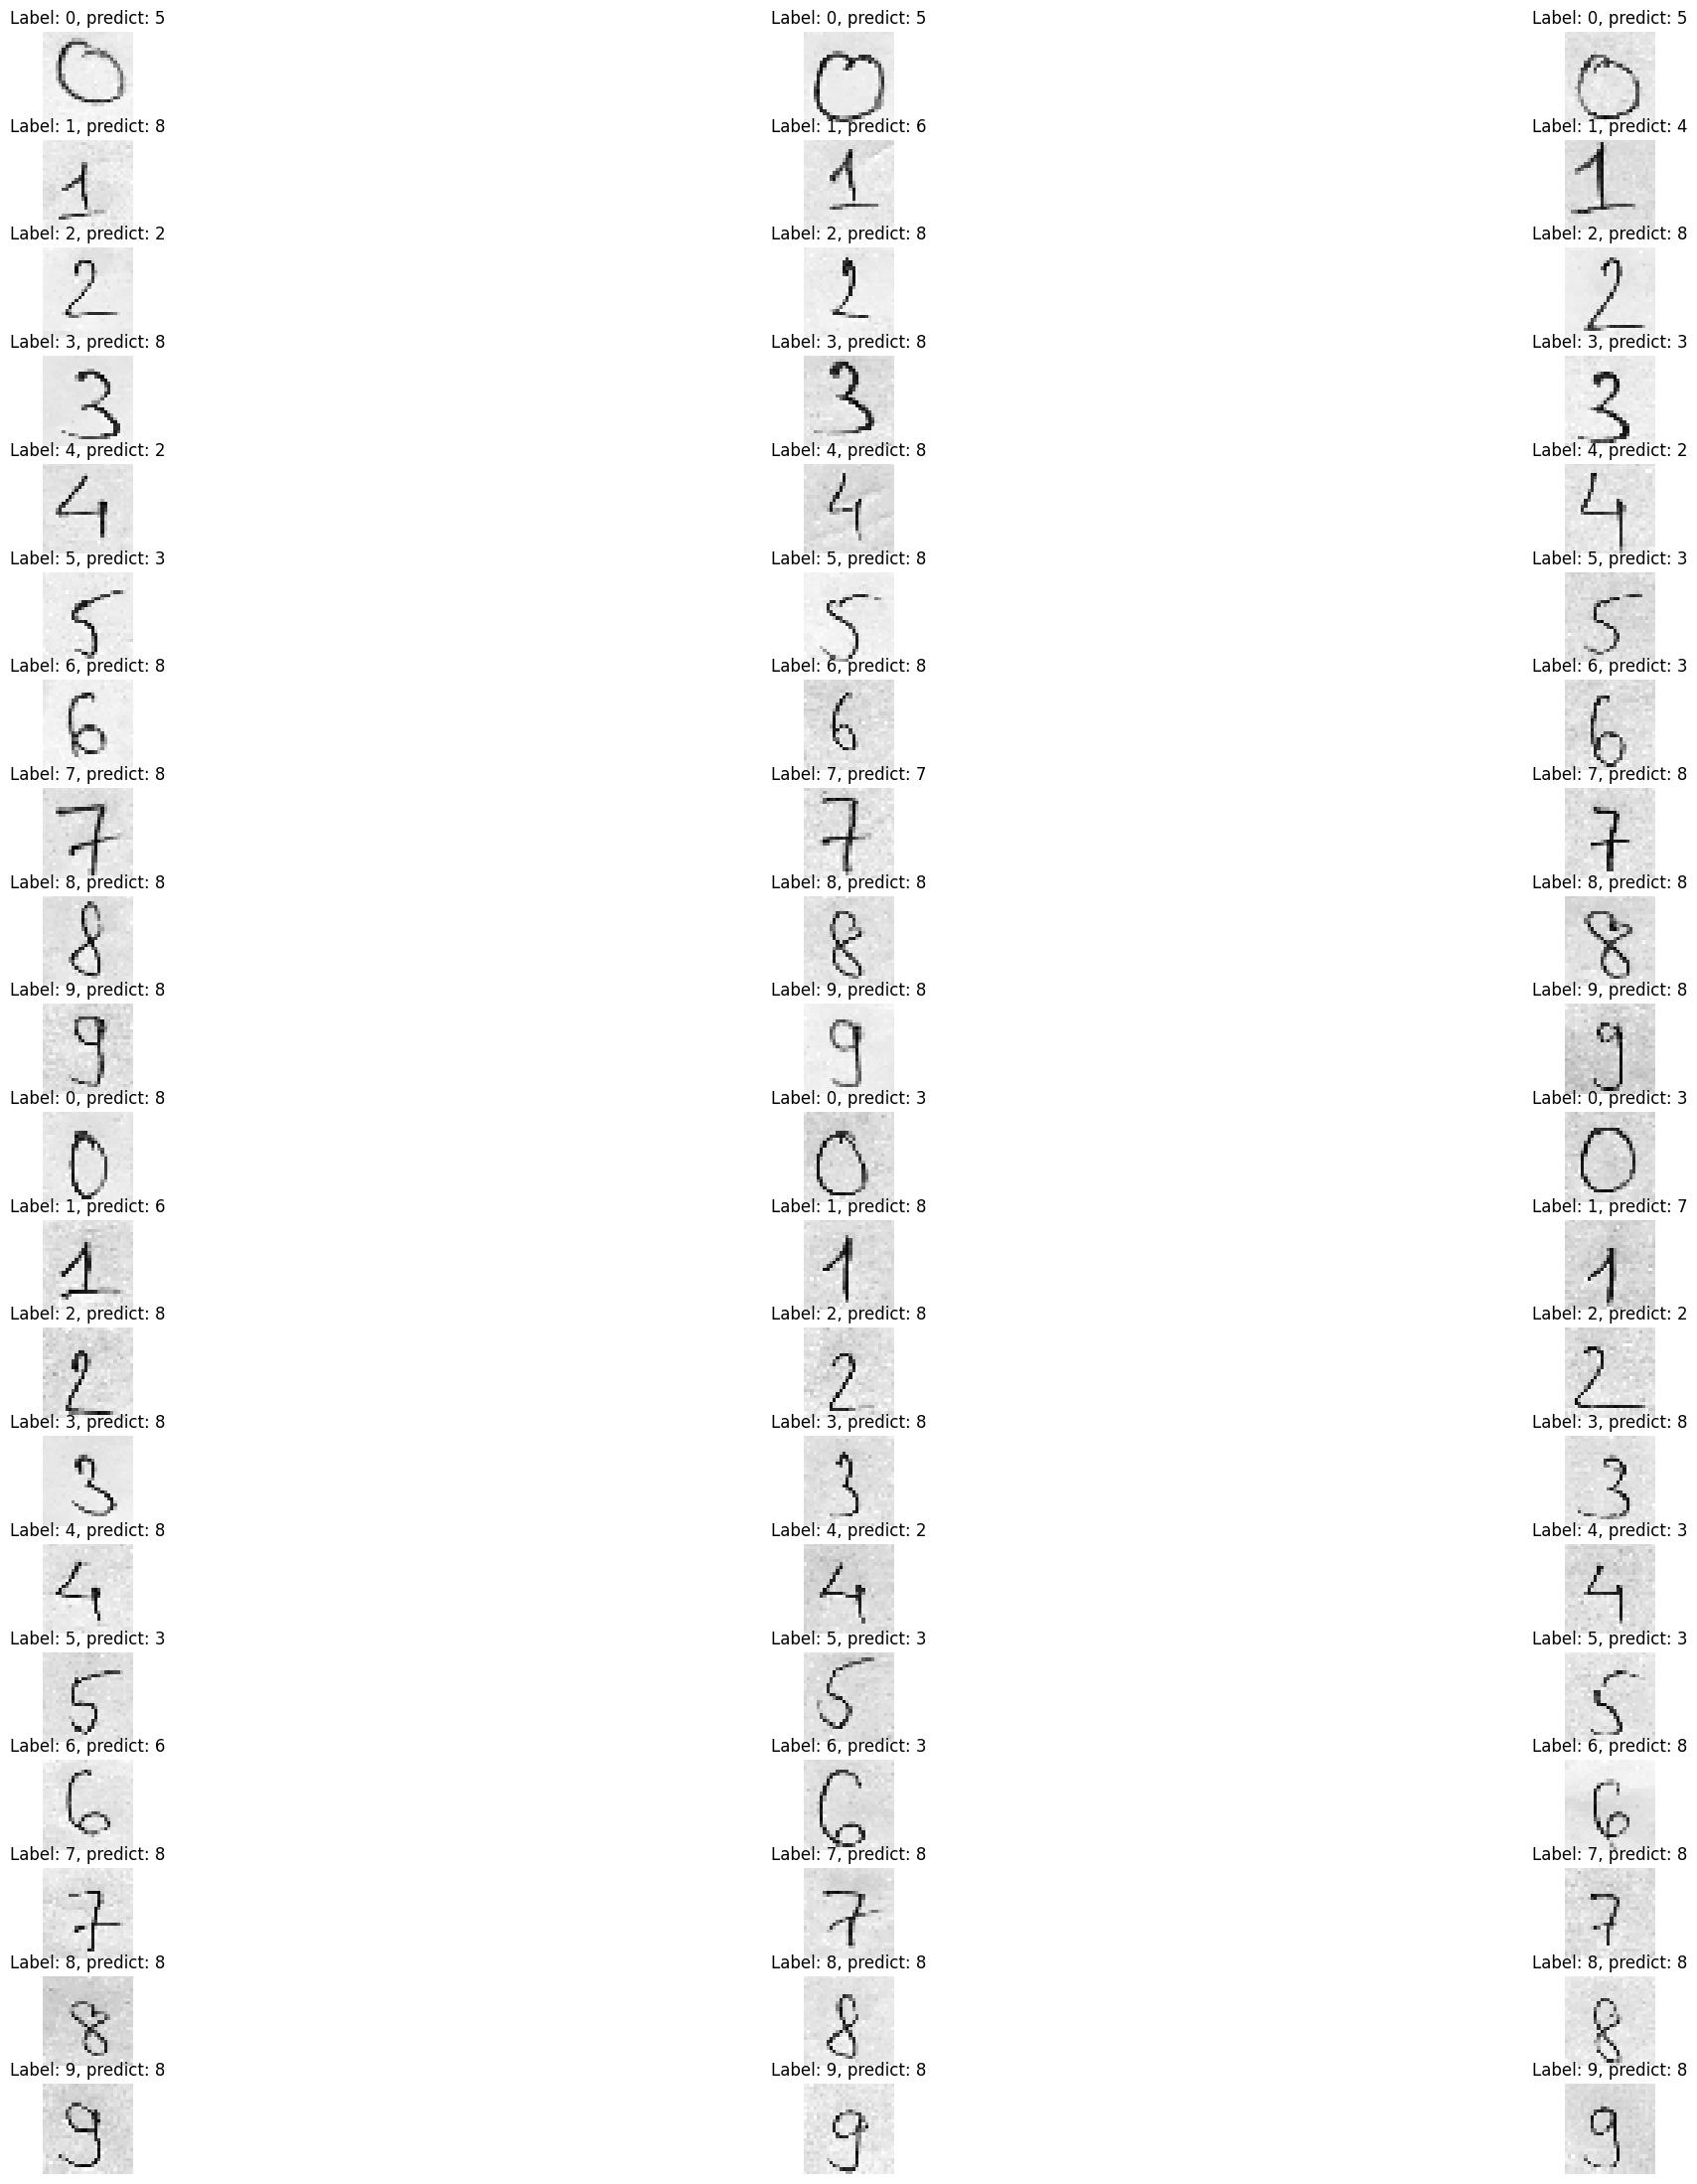

In [31]:
predicted_labels = np.argmax(model.predict(test_dataset), axis = 1)
plt.figure(figsize=(28, 28))
for i in range(0, 60):
    plt.subplot(20, 3, i + 1)
    plt.imshow(test_dataset[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"Label: {np.argmax(label[i])}, predict: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

CÓ THỂ THẤY KẾT QUẢ ĐÁNH GIÁ PHÍA TRÊN ACCURACY CHỈ ĐẠT ĐƯỢC 0.18, MỘT CON SỐ THẤP, CÁC NGUYÊN NHÂN CÓ THỂ XẢY RA LÀ:

    - ĐỘ PHÂN GIẢI CỦA ẢNH MỜ KHIẾN CÁC CHỮ BỊ BIẾN DẠNG.
    - MẦU SẮC CỦA ẢNH, DO TRAIN ẢNH TRÊN NỀN ĐEN CHỮ TRẮNG NHƯNG LẠI ĐƯA INPUT LÀ NÊN TRẮNG CHỮ ĐEN
    - ĐỘ TƯƠNG PHẢN GIỮA CHỮ VIẾT VÀ NỀN KHÔNG RÕ RỆT
    - QUÁ TRÌNH RESIZE GÂY MẤT MÁT DỮ LIỆU
    - ĐIỀU KIỆN ÁNH SÁNG

MỘT SỐ Ý TƯỞNG CẢI TIẾN:

    - DÙNG OPENCV ĐỂ ĐỌC ẢNH, SAU ĐÓ DÙNG THRESHOLD ĐỂ CHUYỂN ẢNH VỀ DẠNG NỀN ĐEN CHỮ TRẮNG
    - DÙNG IMAGEDATAGENERATOR ĐỂ TĂNG CƯỜNG DỮ LIỆU, GIÚP MODEL CÓ THỂ NHẬN DẠNG CHỮ VIẾT Ở CÁC ĐIỀU KIỆN KHÓ HƠN
    
KẾT QUẢ CẢI THIỆN CÓ THỂ RÕ RỆT THẤY PHÍA DƯỚI, MODEL ĐƯA RA MỘT KẾT QUẢ KHÁ CAO VỚI ACCURACY LÀ 0.85.

In [65]:
# run the test harness for evaluating a model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def run_test_harness3():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()

  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  
  # fit model
  aug = ImageDataGenerator(rotation_range=0.15, zoom_range=0.15, width_shift_range=0.15, height_shift_range=0.15, horizontal_flip = False)
  model.fit(aug.flow(trainX, trainY), epochs=10, batch_size=64, verbose = 1)

  # save model
  model.save('final_model2.h5')

run_test_harness3()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7323 - loss: 0.8171
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9370 - loss: 0.2052
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9533 - loss: 0.1501
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9619 - loss: 0.1253
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9664 - loss: 0.1093
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9687 - loss: 0.0991
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9704 - loss: 0.0938
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9724 - loss: 0.0897
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9747 - loss: 0.0796
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9741 - loss: 0.0834


In [32]:
import os
import cv2
def create_dataset_from_folder(folder, label):
    images = []
    labels = []
    def load_image(filename):
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        _, bw_image = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
        bw_image = cv2.resize(bw_image, (28, 28))
        bw_image = bw_image.reshape(28, 28, 1)
        bw_image = bw_image.astype('float32')/255.0
        return bw_image
    for filename in os.listdir(folder):
        img = load_image(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            labels.append(label)
    return images, labels

test_dataset = []
label = []
num_classes = 10

contents = os.listdir('.\\data')
folders = [item for item in contents if os.path.isdir(os.path.join('.\\data', item))]
for folder in folders:
    root_folder = ".\\data\\" + folder
    for class_index in range(0, num_classes):
        class_folder = os.path.join(root_folder, f"{class_index}")
        images, labels = create_dataset_from_folder(class_folder, class_index)
        test_dataset.extend(images)
        label.extend(labels)

In [33]:
#EVALUATATION
import numpy as np
test_dataset = np.array(test_dataset)
label = to_categorical(label)
model = load_model(r'.\final_model2.h5')
model.evaluate(test_dataset, label)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8583 - loss: 0.5973  


[0.6973609924316406, 0.8500000238418579]

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/stepWARNING:tensorflow:5 out of the last 5 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000021083A28A40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


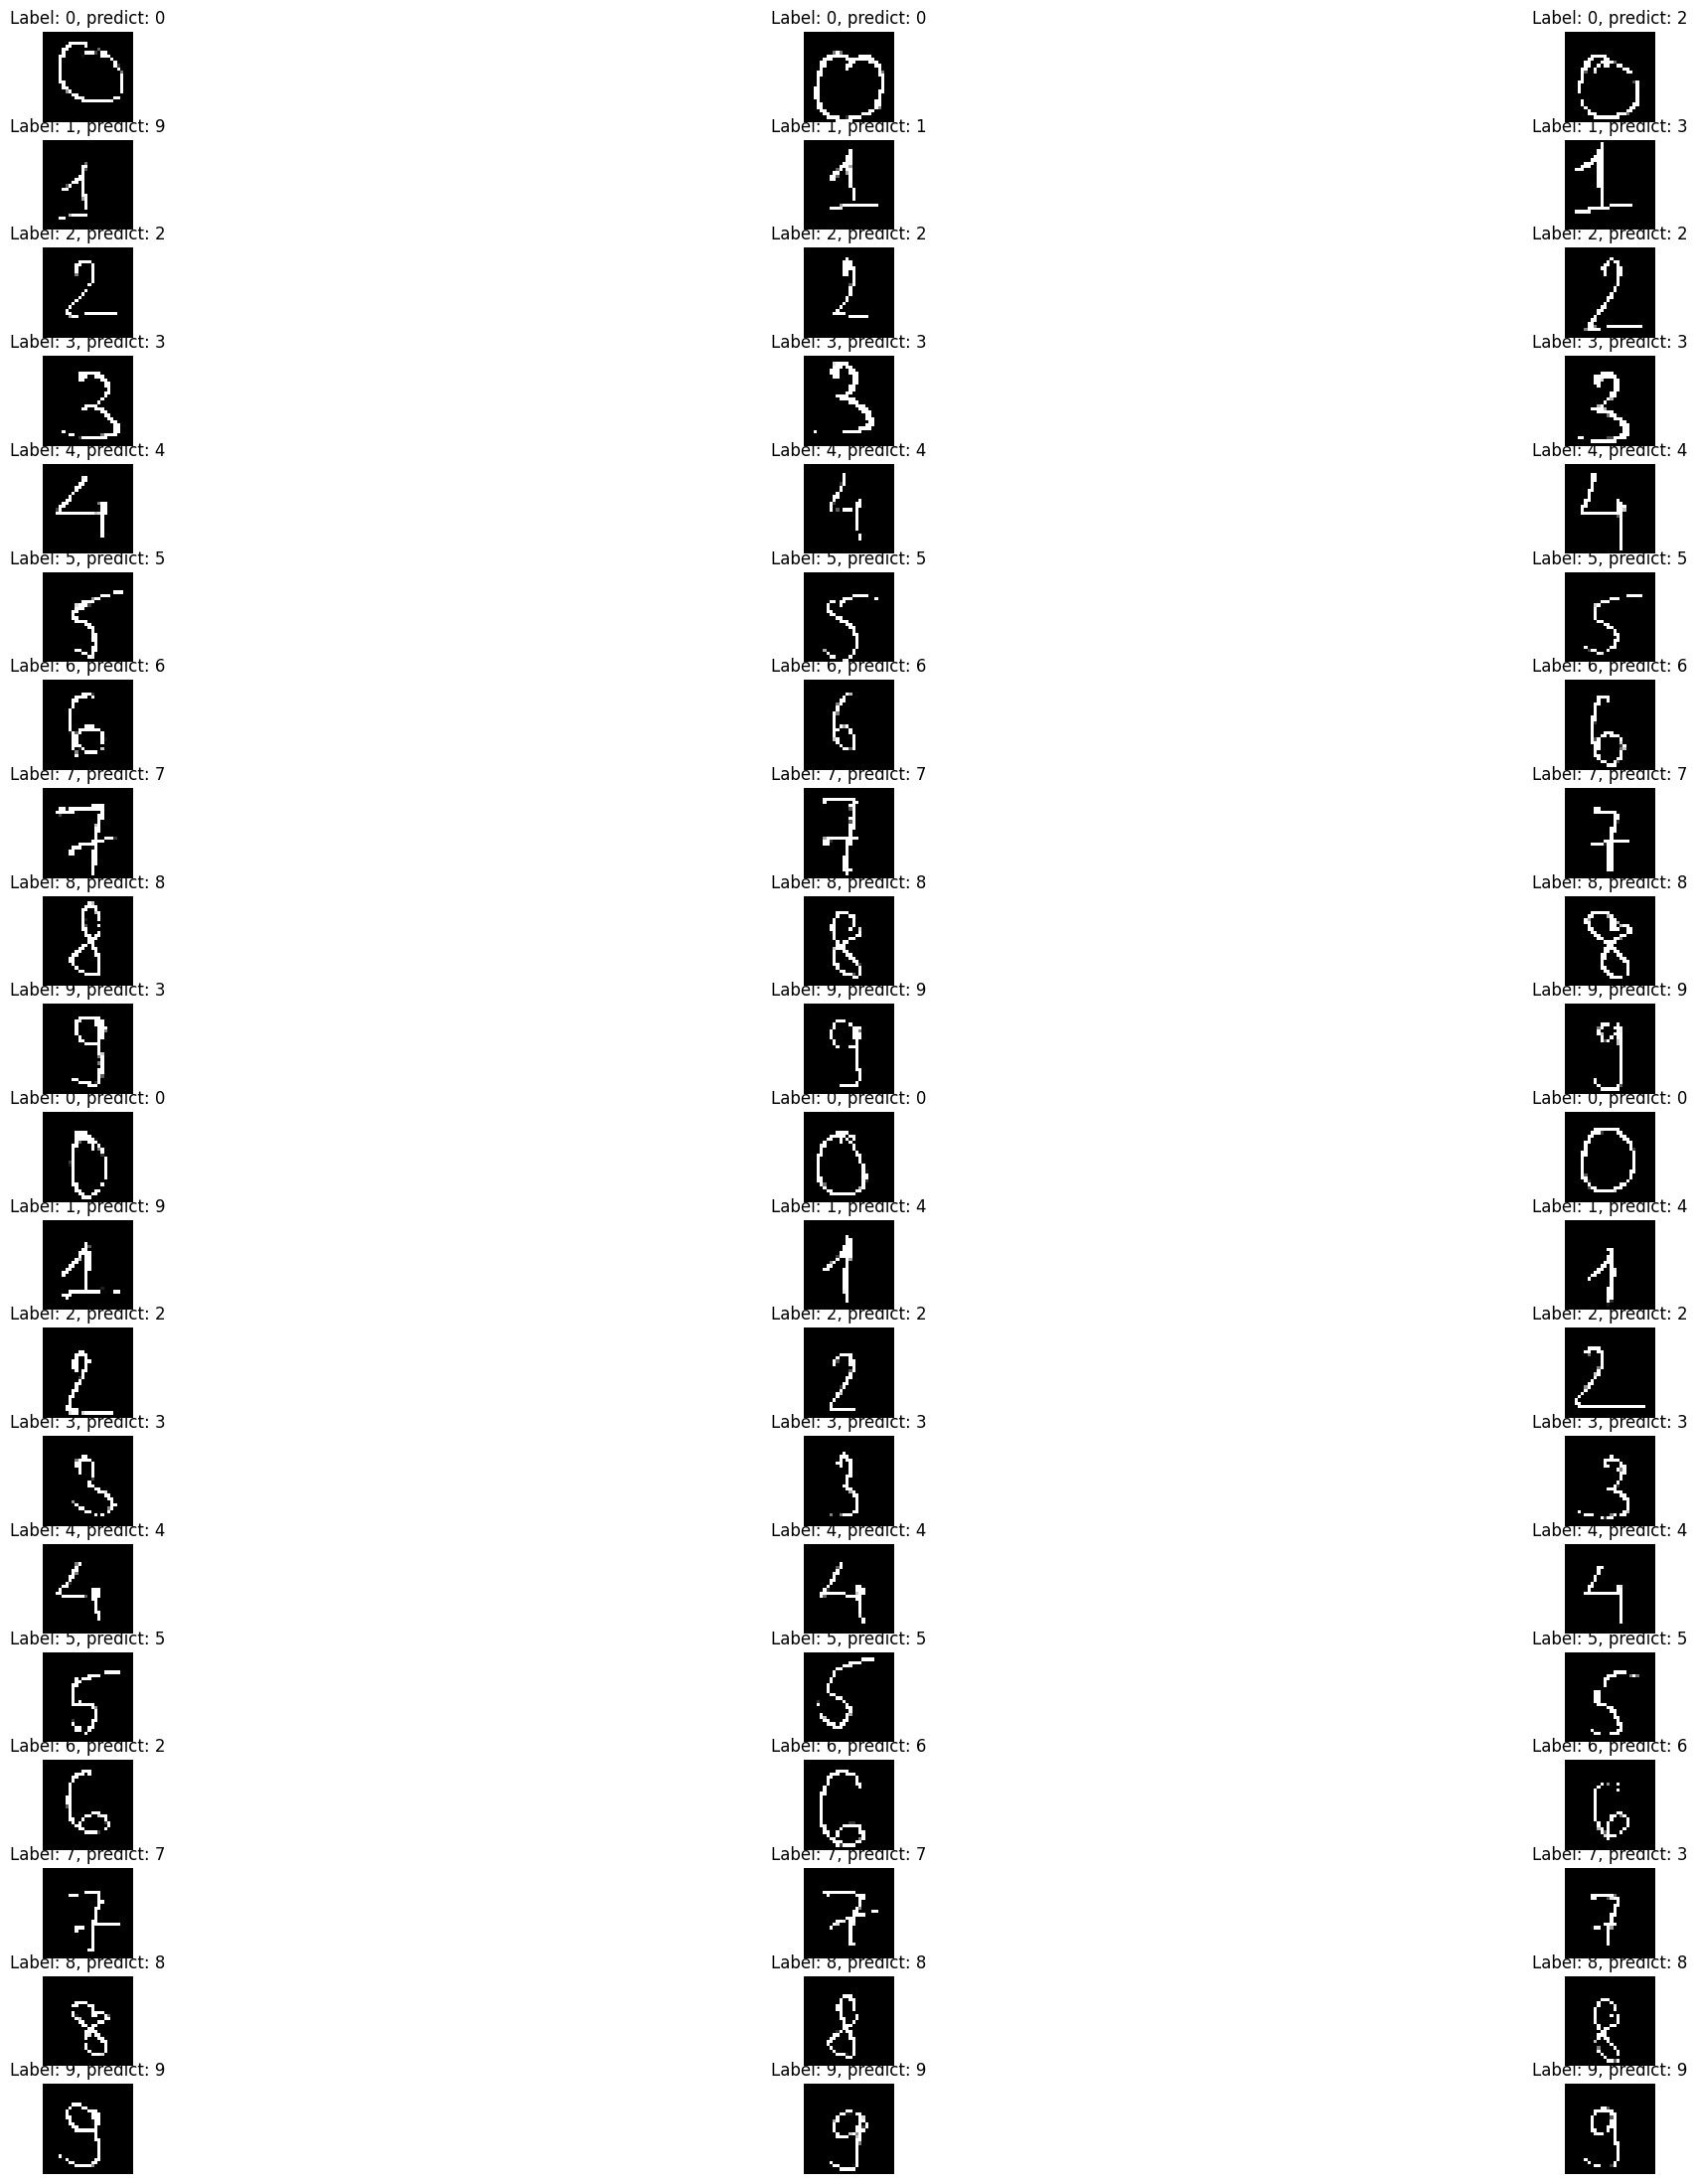

In [34]:
predicted_labels = np.argmax(model.predict(test_dataset), axis = 1)
plt.figure(figsize=(28, 28))
for i in range(0, 60):
    plt.subplot(20, 3, i + 1)
    plt.imshow(test_dataset[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(label[i])}, predict: {predicted_labels[i]}")
    plt.axis('off')
plt.show()